# Telstra Network Disruptions 
### The goal of the problem is to predict Telstra network's fault severity at a time at a particular location based on the log data available. Using a dataset of features from their service logs, task is predicting if a disruption is a momentary glitch or a total interruption of connectivity


##  Data Preperation

##  Import Modules and Datasets

In [40]:
import pandas as pd
import numpy as  np
# Import supplementary visualization code visuals.py
import visuals as vs
import matplotlib.pyplot as plt
%matplotlib inline

dftest = pd.read_csv("fault/test.csv")
df = pd.read_csv("fault/train.csv")
df2=pd.read_csv("fault/event_type.csv")
df3= pd.read_csv("fault/resource_type.csv")
df4=pd.read_csv("fault/severity_type.csv")
df5=pd.read_csv("fault/log_feature.csv")
dfArray=np.array([df2,df3,df4,df5])
dfArray[0].head()


,id,event_type
0,6597,event_type 11
1,8011,event_type 15
2,2597,event_type 15
3,5022,event_type 15
4,5022,event_type 11


## Data Preprocessing :  Data merging to create a Customer Analytical Record(CAR)
#### Merge all dataframes having 'id' as the key excluding dataframe created from train dataset

In [41]:
count = 0
for array in dfArray:
    count+=1
    if count==1:
       temp=array
    else:
       temp = temp.merge(array, on='id', how='inner', suffixes=('_1', '_2'))
temp.head()    

,id,event_type,resource_type,severity_type,log_feature,volume
0,6597,event_type 11,resource_type 8,severity_type 2,feature 68,6
1,8011,event_type 15,resource_type 8,severity_type 2,feature 68,7
2,2597,event_type 15,resource_type 8,severity_type 2,feature 68,1
3,5022,event_type 15,resource_type 8,severity_type 1,feature 172,2
4,5022,event_type 15,resource_type 8,severity_type 1,feature 56,1


## Data cleansing to remove text from variables

In [42]:
#Method1 to Remove text from variables
#better method with apply
def cleanse(str,keyword):
    if keyword in str:
        return str.replace(keyword,"")

In [43]:
#Method2 to Remove text from variables
def stripOffText(str):
    if 'severity_type_' in str:
        return str.replace('severity_type_',"")
    if 'resource_type_' in str:
        return str.replace('resource_type_',"")
    if 'event_type_' in str:
        return str.replace('event_type_',"")
    if 'log_feature_' in str:
        return str.replace('log_feature_',"")
    

In [44]:
#Remove text from variables
temp['severity_type'] = temp.apply(lambda row: cleanse(row['severity_type'], 'severity_type'), axis=1)
temp['resource_type'] = temp.apply(lambda row: cleanse(row['resource_type'], 'resource_type'), axis=1)
temp['event_type'] = temp.apply(lambda row: cleanse(row['event_type'], 'event_type'), axis=1)
temp['log_feature'] = temp.apply(lambda row: cleanse(row['log_feature'], 'feature'), axis=1)
temp.head()


,id,event_type,resource_type,severity_type,log_feature,volume
0,6597,11,8,2,68,6
1,8011,15,8,2,68,7
2,2597,15,8,2,68,1
3,5022,15,8,1,172,2
4,5022,15,8,1,56,1


In [45]:
temp1=df
temp2=dftest
#cleanse temp1 train data frame
temp1['location'] = temp1.apply(lambda row: cleanse(row['location'], 'location'), axis=1)
temp2['location'] = temp2.apply(lambda row: cleanse(row['location'], 'location'), axis=1)
#Merge train and test dataframes with combined data frame 'temp'
result_df = temp1.merge(temp, on='id', how='inner', suffixes=('_1', '_2'))
result_df_test= temp2.merge(temp, on='id', how='inner', suffixes=('_1', '_2'))


## Convert categorical data columns datatypes to integers

In [46]:

# Convert to categorical data columns by converting datatypes of columns to integers
result_df['event_type'] = result_df['event_type'].astype(int)
result_df['severity_type'] = result_df['severity_type'].astype(int)
result_df['resource_type'] = result_df['resource_type'].astype(int)
result_df['log_feature'] = result_df['log_feature'].astype(int)
result_df['location'] = result_df['location'].astype(int)
result_df.info()

#Repeat for test

result_df_test['event_type'] = result_df_test['event_type'].astype(int)
result_df_test['severity_type'] = result_df_test['severity_type'].astype(int)
result_df_test['resource_type'] = result_df_test['resource_type'].astype(int)
result_df_test['log_feature'] = result_df_test['log_feature'].astype(int)
result_df_test['location'] = result_df_test['location'].astype(int)
result_df_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 61839 entries, 0 to 61838
Data columns (total 8 columns):
id                61839 non-null int64
location          61839 non-null int32
fault_severity    61839 non-null int64
event_type        61839 non-null int32
resource_type     61839 non-null int32
severity_type     61839 non-null int32
log_feature       61839 non-null int32
volume            61839 non-null int64
dtypes: int32(5), int64(3)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 84584 entries, 0 to 84583
Data columns (total 7 columns):
id               84584 non-null int64
location         84584 non-null int32
event_type       84584 non-null int32
resource_type    84584 non-null int32
severity_type    84584 non-null int32
log_feature      84584 non-null int32
volume           84584 non-null int64
dtypes: int32(5), int64(2)
memory usage: 3.5 MB


# Exploratory Data Analysis

#### Chi-square test is performed to understand correlation between categorical variables
#### Below analysis shows location and id are strongly correlated and we can drop one of them
#### Spearman corr test is performed to understand correlation between categorical vs numericals


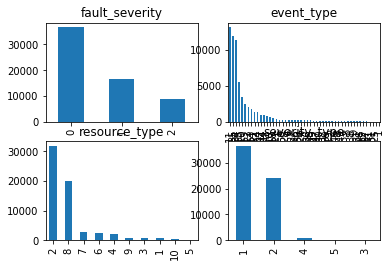

In [47]:
#Plot feature vs frequency
fig = plt.figure()
fig11 = fig.add_subplot(221)
fig11=result_df['fault_severity'].value_counts().plot(kind = 'bar',title="fault_severity")
fig12 = fig.add_subplot(222)
fig12=result_df['event_type'].value_counts().plot(kind = 'bar',title="event_type")
fig21 = fig.add_subplot(223)
fig21=result_df['resource_type'].value_counts().plot(kind = 'bar',title="resource_type")
fig22 = fig.add_subplot(224)
fig22=result_df['severity_type'].value_counts().plot(kind = 'bar',title="severity_type")


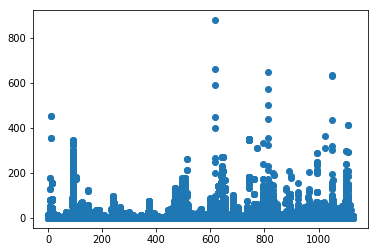

In [48]:
#Check for outliers
plt.scatter(result_df['location'],result_df['volume'])
#result_df=result_df[result_df['volume']<400]


## chi-square test of independence

In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# Select two features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=2)
X_kbest = chi2_selector.fit_transform(result_df,result_df['fault_severity'])
type(X_kbest)

# Show results
print('Original number of features:', result_df.shape[1])
print('Reduced number of features:', X_kbest.shape[1])
X_kbest


Original number of features: 8
Reduced number of features: 2


array([[14121,   118],
       [14121,   118],
       [14121,   118],
       ..., 
       [17067,   885],
       [17067,   885],
       [17067,   885]], dtype=int64)

## Spearman corr for numerical vs categorical

In [50]:
#location event_type ,resource_type and severity_type and log_feature are related
result_df.corr(method='spearman')


,id,location,fault_severity,event_type,resource_type,severity_type,log_feature,volume
id,1.000000,-0.027298,-0.035930,0.019441,-0.013694,0.027083,-0.010111,-0.002106
location,-0.027298,1.000000,0.271742,-0.383049,0.429917,-0.424742,-0.304589,0.071210
fault_severity,-0.035930,0.271742,1.000000,-0.261497,0.290473,-0.360594,-0.238632,-0.046634
event_type,0.019441,-0.383049,-0.261497,1.000000,-0.596874,0.414419,0.523528,0.091495
resource_type,-0.013694,0.429917,0.290473,-0.596874,1.000000,-0.392140,-0.491933,-0.043653
severity_type,0.027083,-0.424742,-0.360594,0.414419,-0.392140,1.000000,0.382624,0.126415
log_feature,-0.010111,-0.304589,-0.238632,0.523528,-0.491933,0.382624,1.000000,0.043322
volume,-0.002106,0.071210,-0.046634,0.091495,-0.043653,0.126415,0.043322,1.000000


In [51]:
#Check for missing columns and rows
result_df.isnull().sum()
result_df.head()

,id,location,fault_severity,event_type,resource_type,severity_type,log_feature,volume
0,14121,118,1,34,2,2,312,19
1,14121,118,1,34,2,2,232,19
2,14121,118,1,35,2,2,312,19
3,14121,118,1,35,2,2,232,19
4,9320,91,0,34,2,2,315,200


# Convert Categoricals using Get_Dummies

In [82]:
#Dumify all the categorical data columns..
df_with_dummies = pd.get_dummies( result_df, columns = ['location','resource_type','event_type','severity_type','log_feature'],drop_first=True )
df_with_dummies.head()

#for test set
df_with_dummies_test = pd.get_dummies( result_df_test, columns = ['location','resource_type','event_type','severity_type','log_feature'],drop_first=True )
df_with_dummies_test

,id,volume,location_2,location_3,location_4,location_6,location_7,location_8,location_9,location_10,...,log_feature_377,log_feature_378,log_feature_379,log_feature_380,log_feature_381,log_feature_382,log_feature_383,log_feature_384,log_feature_385,log_feature_386
0,11066,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11066,28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11066,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11066,26,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11066,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,11066,28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,11066,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,11066,26,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,18000,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,18000,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
#Get list of all column_names
li=list(df_with_dummies.columns.values)
li_test=list(df_with_dummies_test.columns.values)
len(li)


1322

## Perform Groupby “id” with aggregation function sum()

In [59]:
df_grouped=pd.DataFrame(df_with_dummies.groupby(['id'],as_index=False,sort=False)[li[1:]].sum(),dtype=int)

df_grouped_test=pd.DataFrame(df_with_dummies_test.groupby(['id'],as_index=False,sort=False)[li_test[1:]].sum(),dtype=int)

#result_df_grouped=pd.DataFrame(result_df.groupby(['id'],as_index=False,sort=False)[li2[1:]].max(),dtype=int)



## Drop ”fault_severity” column from train dataset as it is the target variable

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_grouped, df['fault_severity'], train_size = 0.70, test_size=0.30,random_state = 60)
X_train.head()

,id,fault_severity,volume,location_2,location_3,location_4,location_5,location_6,location_7,location_8,...,log_feature_371,log_feature_373,log_feature_374,log_feature_375,log_feature_376,log_feature_377,log_feature_378,log_feature_380,log_feature_383,log_feature_384
3021,5147,2,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5146,12907,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5156,4122,20,52,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4291,17397,0,24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4219,9754,4,832,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
X_train.shape

(5166, 1322)

In [100]:
#X_test=df_grouped_test
X_test.shape

(2215, 1322)

In [118]:
# Import two metrics from sklearn - fbeta_score and accuracy_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from time import time

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner.fit(X_train,y_train)
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end-start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,average='macro',beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,average='macro',beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, we implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.



In [134]:
import matplotlib.pyplot as pl
def evaluate(results, accuracy, f1):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = pl.subplots(2, 3, figsize = (11,7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    pl.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    pl.tight_layout()
    pl.show()

GaussianNB trained on 51 samples.
GaussianNB trained on 516 samples.
GaussianNB trained on 5166 samples.
DecisionTreeClassifier trained on 51 samples.
DecisionTreeClassifier trained on 516 samples.
DecisionTreeClassifier trained on 5166 samples.
RandomForestClassifier trained on 51 samples.
RandomForestClassifier trained on 516 samples.
RandomForestClassifier trained on 5166 samples.


NameError: name 'mpatches' is not defined

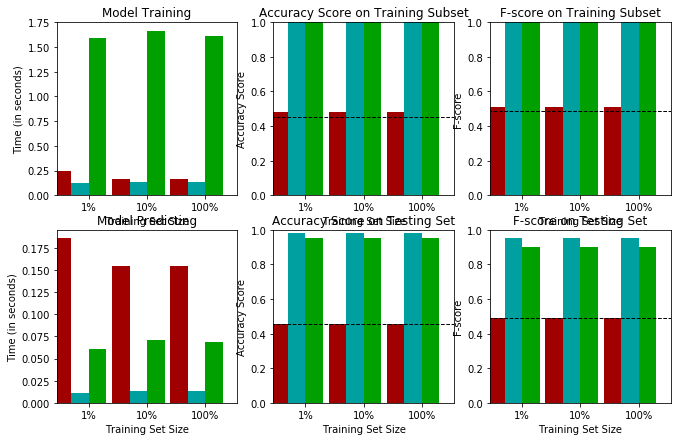

In [135]:
# TODO: Import the three supervised learning models from sklearn
# Import supplementary visualization code visuals.py
import visuals as vs
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
# TODO: Initialize the three models
clf_A = GaussianNB(priors=None)
clf_B = DecisionTreeClassifier(random_state=42)
clf_C = RandomForestClassifier(random_state=42,n_estimators=50)
#clf_A = AdaBoostClassifier(random_state = 42)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(0.1*samples_100)
samples_1 = int(0.01*samples_100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
accuracy= accuracy_score(y_test, clf_A.predict(X_test))
fscore = fbeta_score(y_test, clf_A.predict(X_test),average='macro' ,beta = 0.5)
evaluate(results, accuracy, fscore)        


## Utilize GridSearchCV technique to obtain best fit classifier 

In [139]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
# TODO: Initialize the classifier
#clf =LogisticRegression(C=10)
#clf=SVC(kernel = 'rbf', degree = 2, gamma = 200)
clf = GradientBoostingClassifier(random_state=42,n_estimators=10)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'max_depth':[3],'min_samples_leaf':[1], 'min_samples_split':[2]}


# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score,average='macro',beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, average='macro',beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions,average='macro', beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 1.0000
F-score on testing data: 1.0000

Optimized Model
------
Final accuracy score on the testing data: 1.0000
Final F-score on the testing data: 1.0000


In [141]:
#Use the best fit model obtained above to train 
clf = GradientBoostingClassifier(random_state=42,n_estimators=10)
clf.fit(X_train,y_train)
y_test = clf.predict(X_test)

In [142]:
classifier_score = clf.score(X_test, y_test)
print("SignalSeverityModel",classifier_score)

SignalSeverityModel 1.0


### Evaluation Metrics :Precision-Recall metrics for classification problem

In [144]:
from sklearn.metrics import classification_report
y_true = df['fault_severity']
y_pred=clf.predict(df_grouped)
target_names = ['fault_severity_0', 'fault_severity_1', 'fault_severity_2']
print(classification_report(y_true, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

fault_severity_0       1.00      1.00      1.00      4784
fault_severity_1       0.88      0.91      0.89      1871
fault_severity_2       0.75      0.68      0.71       726

     avg / total       0.94      0.95      0.94      7381



In [146]:
#Test with known value
pred=clf.predict(df_grouped[df_grouped['volume']==19])
#len(pred)
pred

array([0, 2, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 0], dtype=int64)

###  Predicted Probabilities for Classes 1,2,3

In [148]:
probas = clf.predict_proba(df_grouped)
location=result_df_grouped['location']
id=result_df_grouped['id']
n_classes = np.unique(y_pred).size
probas[:,0]


NameError: name 'result_df_grouped' is not defined

### Generate Output excel having with location,probabilities,y_pred

In [ ]:
#Create a new dataframe with location,probabilities,y_pred
arr=[id,probas[:,0],probas[:,1],probas[:,2]]
arr=np.array(arr)
cols = ['id','predict_0','predict_1','predict_2']
df_final = pd.DataFrame(arr.T,columns=cols)
df_final
df_final.to_csv('output1.csv', sep=',', encoding='utf-8')